<div align="center"> <font size=6, color='blue'> Data Analysis on Used Car Sales in Belarus</font></div>


<div align="center"> <font size=3, color='blue'>
By Team: 3G's <br>
    (Gabriela Liera, Geeta Ganesh, and Gargi Misra)</font></div>


# Introduction

#### Our project is based on a dataset of a 2019 online catalog for used cars market in Belarus (eastern Europe). 

#### Some information on Belarus:
- It is located between Russia and Poland
- 95% of the population speak Russian
- Its currency is Belarusian ruble (BYN), also called bunny by its people
- In spring of 2019, $1 USD was equal to 2.15 BYN

<img src="pictures/belarus map2.jfif">

#### The dataset contains data that was parsed from car ads in an online catalog. This dataset is useful for both the buyer and the seller in the used car market in Belerus.

We got our dataset from: <br>
https://www.kaggle.com/lepchenkov/usedcarscatalog       

# Questions

1. Which region has the highest number of cars listed in the online catalog?
2. In this region, which car brands and models have the highest listing in the catalog?
3. Which body type and color has the highest listing?
4. Which transmission, fuel type, and drive-wheel has the highest listing?
5. What are the average prices per body type?
6. What is the range of the price and the age of the cars listed?
7. Is there a correlation between the age of car and price?
8. Do expensive cars have more number of photos?
9. Does having more photos lead to more views?
10. If the number of views increase, do the number of days listed decrease?
11. Is there a relationship between the type of transmission and the price of the car?
12. Are the diesel car prices significantly higher or lower than the gasoline car prices?
13. Are transmission and fuel types independent or dependent?

# Importing required libraries

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#set default Seaborn style
sns.set()

#Interactive plot libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

#stats
import scipy.stats as stats
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import CompareMeans

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#To display graphs and save them in Jupyter Notebook
%matplotlib inline

In [2]:
#Code to hide warning messages in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

# Importing Data

**Load the csv file into a dataframe called dfCars**

In [3]:
# Read the Cars csv file and load into a dataframe called dfCars.
dfCars = pd.read_csv('data/cars.csv')

## Exploring Data

**Display the first 5 rows of the dfCars dataframe**

In [4]:
#Display the first 5 rows of the dfCars dataframe
dfCars.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


**Display the last 5 rows of the dfCars dataframe**

In [5]:
#Display the last 5 rows of the dfCars dataframe
dfCars.tail(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490
38530,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,True,632


**Display the number of rows and columns in the dataframe**

In [6]:
# Display the number of rows and columns in the dataframe by using shape
dfCars.shape

(38531, 30)

**Display the column names on a separate line**

In [7]:
# Display the column names on a separate line for better readability
for col in dfCars:
    print(col)

manufacturer_name
model_name
transmission
color
odometer_value
year_produced
engine_fuel
engine_has_gas
engine_type
engine_capacity
body_type
has_warranty
state
drivetrain
price_usd
is_exchangeable
location_region
number_of_photos
up_counter
feature_0
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
duration_listed


**Display detailed information about the dataframe**

In [8]:
# Display detailed information about the dataframe
dfCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

**In this dataset there are 38531 rows, 30 columns and:**
<br>
 - **7  columns with numerical values (integer and float)**
 - **13 columns with boolean values** 
 - **10 columns with categorical values**

### Exploring Numerical Data

In [9]:
dfCars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


#### Statistical values for all the numerical columns:
**For odometer:**
 - min is 0 (zero), max is 1,000,000 km <br>
 
**For price:**
 - min is 1 and max is 50,000
 - 25% is 2,100, 50% (median) is 4,800, mean is 6,639.97, std dev is 6,428.15
 - since the mean is greater than median, we need to check for positive skew in the distribution <br>
 
**For duration_listed:**
 - max is 2,232, which means a car was listed on the catalog for 6.1 years.

### Exploring Boolean Data (Bool)

**Let's see the unique values of Boolean data columns**

In [10]:
# Display unique values in is_exchangeable column
dfCars['is_exchangeable'].value_counts().to_frame()

,is_exchangeable
False,24945
True,13586


**Approxiamtely one-third of the used cars listed, the owners were agreeable to exchange their cars. This is outside our scope of analysis, we will be dropping this column.**

In [11]:
# Display unique values in has_warranty column
dfCars['has_warranty'].value_counts().to_frame()    

,has_warranty
False,38082
True,449


**Since a fraction of the cars have warranty, this information is not useful for our analysis, we will be dropping this column.**

In [12]:
# Display unique values in feature_0 column
dfCars['feature_0'].value_counts().to_frame()

,feature_0
False,29725
True,8806


**feature_0 to feature_9 have options such as alloy wheels and conditioner. This is not useful for our analysis, we will be dropping all these columns.**

### Exploring Categorical Data (Objects)

**Let's examine the categorical columns.**

In [13]:
#Describe all the categorical columns, which are objects
dfCars.describe(include=['object'])

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain,location_region
count,38531,38531,38531,38531,38531,38531,38531,38531,38531,38531
unique,55,1118,2,12,6,3,12,3,3,6
top,Volkswagen,Passat,mechanical,black,gasoline,gasoline,sedan,owned,front,Минская обл.
freq,4243,1423,25633,7705,24065,25647,13011,37723,27746,24230


**This shows the count, unique values, top and frequently occuring values in the dataframe**

In [14]:
# Display unique values in engine_fuel column 
dfCars['engine_fuel'].value_counts().to_frame()

,engine_fuel
gasoline,24065
diesel,12872
gas,1347
hybrid-petrol,235
electric,10
hybrid-diesel,2


**Besides gasoline and diesel cars, there are cars that have liquified natural gas, hybrid-petrol, electric, and hybrid-diesel as engine fuel.
We will be focusing on cars that are ONLY gasoline and diesel. So, we will filter out the remaining unique values.**

In [15]:
# Display unique values in state column 
dfCars['state'].value_counts().to_frame()

,state
owned,37723
new,438
emergency,370


**Almost all the cars are owned (used). Cars that are new and emergency are outliers, and we will filter them out.**

# Cleaning Data

**In this section, we will start cleaning, dropping (columns and rows), and renaming the columns**

**First, we check for Null values**

In [16]:
# Find which columns contain null values
dfCars.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

**Column engine_capacity has 10 null values. Let's find these 10 null values**

In [17]:
# Find the rows that contain 10 null values
dfnan = dfCars[dfCars.isna().any(axis=1)]

#Display all rows with NaN
dfnan

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


**All 10 rows show that engine_capacity have engine_type as electric cars. 
Electric vehicles do not contain tanks, hence, the engine_capacity has NaN.
We will drop these 10 rows.**

In [18]:
#Confirm there are 10 electric type vehicles
dfCars['engine_type'].value_counts().to_frame()

,engine_type
gasoline,25647
diesel,12874
electric,10


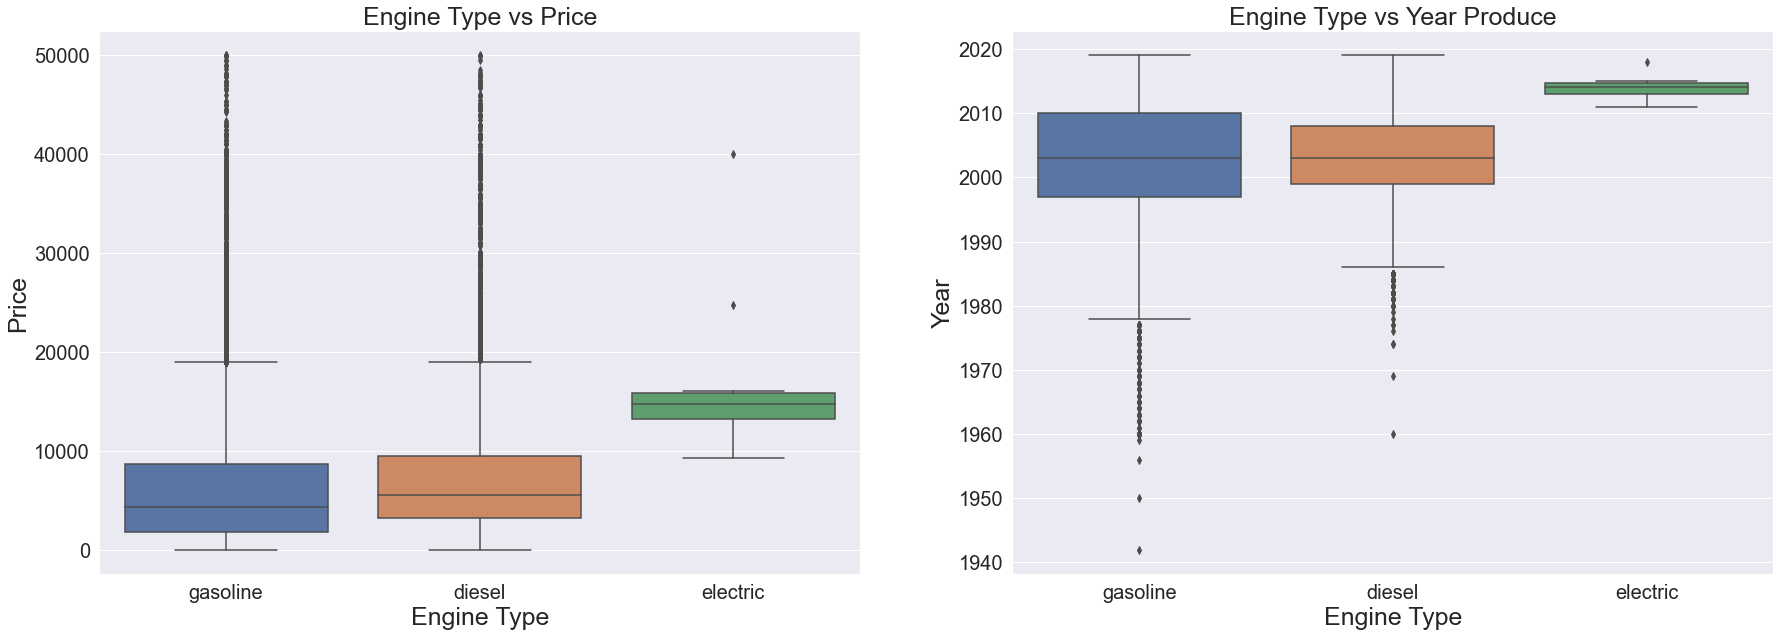

In [19]:
#Set figure to plot 2 graphs
fig, axs = plt.subplots(ncols=2, figsize=(30,10))

#Plot engine type vs price
g1 = sns.boxplot(x= 'engine_type', y='price_usd', data=dfCars, ax=axs[0])
g1.set_title('Engine Type vs Price', fontsize=25)
g1.set_xlabel('Engine Type',fontsize=25)
g1.set_ylabel('Price',fontsize=25) 
g1.tick_params(labelsize=20)

#plot engine type vs year produced
g2 = sns.boxplot(x= 'engine_type', y='year_produced', data=dfCars, ax=axs[1])
g2.set_title('Engine Type vs Year Produce', fontsize=25)
g2.set_xlabel('Engine Type',fontsize=25)
g2.set_ylabel('Year',fontsize=25) 
g2.tick_params(labelsize=20)

plt.show()

**As you can see, electric cars are outliers for both price and year produce. Since there are only 10 records of electric cars. We will filter out those records.**

## Function (1)

**Drop all electric cars rows with a function**

In [20]:
# Create a function to filter out electric cars and keep gasoline and diesel cars
def gas_dieselCars(data):
    tempdf = data[(data["engine_type"]=="gasoline")| (data["engine_type"]=="diesel")]
      
    #Return the new dataframe
    return tempdf

In [21]:
#Enter the dataframe into the function to return only gas & diesel cars
dfCars = gas_dieselCars(dfCars)

#Confirm only previously owned cars in dataframe
dfCars["engine_type"].value_counts().to_frame()

,engine_type
gasoline,25647
diesel,12874


**We will focus only on previously owned cars**

In [22]:
# Display the unique values in state column
dfCars['state'].value_counts().to_frame()

,state
owned,37713
new,438
emergency,370


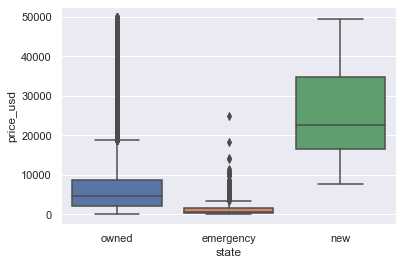

In [23]:
# Display a plot showing the different values in state column
sns.boxplot(data=dfCars,x = 'state', y= 'price_usd')

## Function (2)

**Drop new and emergency state cars using a function**

In [24]:
# Created a usedCars function to narrow our data set down to "owned" car only which means used cars
def usedCars(data):
    tempdf = data[(data["state"]=="owned")]
      
    #Return the new dataframe
    return tempdf

In [25]:
#Enter the dataframe into the function to return only 'owned' cars
dfCars = usedCars(dfCars)

#Confirm only previously owned cars in dfCars dataframe
dfCars["state"].value_counts().to_frame()

,state
owned,37713


**Going forward, our dataframe dfCars only has cars that are "owned", and have gasoline and diesel fuel types.**

### Drop columns that are not needed

In [26]:
#Drop 14 columns that are not needed or are out of scope of our analysis

dfCars.drop(columns=['feature_0',
                    'feature_1',
                    'feature_2',
                    'feature_3',
                    'feature_4',
                    'feature_5',
                    'feature_6',
                    'feature_7',
                    'feature_8',
                    'feature_9',
                    'is_exchangeable',
                    'has_warranty',
                    'engine_has_gas',
                    'engine_fuel',
                    'state'],
                    inplace=True) # inplace is True to keep changes

**Display dataframe after dropping columns**

In [27]:
#Display first 5 rows of dfCars dataframe
dfCars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_type,engine_capacity,body_type,drivetrain,price_usd,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,2.5,universal,all,10900.00,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,3.0,universal,all,5000.00,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,2.5,suv,all,2800.00,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,all,9999.00,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,2.5,universal,all,2134.11,Гомельская обл.,14,7,7


In [28]:
# Display the number of rows and columns in dfCars dataframe
dfCars.shape

(37713, 15)

# Organizing Data

**Using the column year_produced, let's create a column "Age of Car"**

In [29]:
# Calculate Age of Car 
dfCars['Age of Car'] = 2020 - dfCars['year_produced']

In [30]:
# Display the top five rows of dfCars dataframe 
dfCars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_type,engine_capacity,body_type,drivetrain,price_usd,location_region,number_of_photos,up_counter,duration_listed,Age of Car
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,2.5,universal,all,10900.00,Минская обл.,9,13,16,10
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,3.0,universal,all,5000.00,Минская обл.,12,54,83,18
2,Subaru,Forester,automatic,red,402000,2001,gasoline,2.5,suv,all,2800.00,Минская обл.,4,72,151,19
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,all,9999.00,Минская обл.,9,42,86,21
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,2.5,universal,all,2134.11,Гомельская обл.,14,7,7,19


**For better readability rename columns**

In [31]:
# Rename column names
new_columns =    {  'manufacturer_name':'Brand',
                    'model_name'       :'Model',
                    'transmission'     :'Transmission',
                    'color'            :'Color',
                    'odometer_value'   :'Odometer',
                    'year_produced'    :'Year',
                    'engine_type'      :'Fuel Type',
                    'engine_capacity'  :'Engine Capacity (liters)',
                    'body_type'        :'Body Type',
                    'drivetrain'       :'Drive-Wheel',
                    'price_usd'        :'Price (USD)',
                    'location_region'  :'Region',
                    'number_of_photos' :'Number of Photos',
                    'up_counter'       :'Number of Views',
                    'duration_listed'  :'Number of Days Listed'
                  }

# Change column names
dfCars.rename(columns=new_columns, inplace=True)

In [32]:
# Display the first 5 rows of dfCars data frame
dfCars.head()

,Brand,Model,Transmission,Color,Odometer,Year,Fuel Type,Engine Capacity (liters),Body Type,Drive-Wheel,Price (USD),Region,Number of Photos,Number of Views,Number of Days Listed,Age of Car
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,2.5,universal,all,10900.00,Минская обл.,9,13,16,10
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,3.0,universal,all,5000.00,Минская обл.,12,54,83,18
2,Subaru,Forester,automatic,red,402000,2001,gasoline,2.5,suv,all,2800.00,Минская обл.,4,72,151,19
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,all,9999.00,Минская обл.,9,42,86,21
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,2.5,universal,all,2134.11,Гомельская обл.,14,7,7,19


**There are Russian names for Region. We will change these names to English** 

In [33]:
#Display Belarus regions 
dfCars['Region'].value_counts().to_frame()

,Region
Минская обл.,23573
Гомельская обл.,3109
Витебская обл.,2970
Брестская обл.,2949
Могилевская обл.,2652
Гродненская обл.,2460


In [34]:
#Change Russian region names to English 

dfCars['Region'].replace(to_replace= {'Минская обл.'    :'Minsk',
                                      'Гомельская обл.' :'Gomel',
                                      'Витебская обл.'  :'Vitebsk',
                                      'Брестская обл.'  :'Brest',
                                      'Могилевская обл.':'Mogilev',
                                      'Гродненская обл.':'Grodno'},value=None, inplace=True)
#Display 'Region' to show changed names
dfCars["Region"].unique()                                            

array(['Minsk', 'Gomel', 'Brest', 'Mogilev', 'Vitebsk', 'Grodno'],
      dtype=object)

<img src="pictures\Belarus_provinces.png">

**We will change Russian Brand names to English** 

In [35]:
#Change Russian brands (ВАЗ, ГАЗ, ЗАЗ, Москвич, УАЗ) to English 
dfCars['Brand'].replace(to_replace= {'ВАЗ':'AvtoVAZ', 
                                     'ГАЗ':'GAZ', 
                                     'ЗАЗ':'ZAZ', 
                                     'Москвич':'Moskvitch', 
                                     'УАЗ':'UAZ'}, value= None, inplace=True)

#Display 'Brand' to show changed names
dfCars['Brand'].unique()

array(['Subaru', 'LADA', 'Dodge', 'UAZ', 'Kia', 'Opel', 'Moskvitch',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'AvtoVAZ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ZAZ', 'Toyota',
       'GAZ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

# Data Visualization

<font size=4, color='blue'>Which region has the highest number of cars listed in the online catalog?</font>

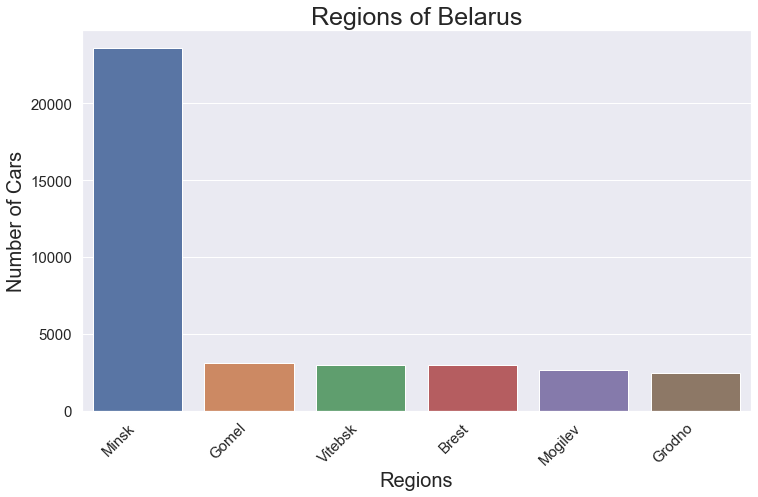

In [36]:
# Display the region with the highest number of cars

# Set figure
plt.figure(figsize=(12,7))
# Set sns style for the plot
sns.set_style('darkgrid')

# Display a countplot  
sns.countplot(x='Region',data=dfCars, order=dfCars['Region'].value_counts().index)

# Set ticks for x and y axis
plt.xticks(rotation=45,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis, and title
plt.xlabel('Regions',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Regions of Belarus',fontsize=25)


# Show the plot
plt.show()

**Minsk, which is the capital of Belarus, has the highest number of cars.**

### We are interested in the used cars in Minsk region

In [37]:
# Display all the rows for Minsk Region
df_region = dfCars.loc[dfCars['Region'] == 'Minsk']
# Show the length or the number of rows
len(df_region)

23573

**Let's drop all regions that are not Minsk**

In [38]:
# Drop all the Regions that are not Minsk
dropindex=dfCars[(dfCars['Region'] == 'Gomel')   |
                 (dfCars['Region'] == 'Vitebsk') | 
                 (dfCars['Region'] == 'Brest')   |
                 (dfCars['Region'] == 'Mogilev') |
                 (dfCars['Region'] == 'Grodno')  
                ].index
dfCars.drop(dropindex, inplace=True)

In [39]:
# Display value counts of Minsk Region
dfCars['Region'].value_counts()

Minsk    23573
Name: Region, dtype: int64

**We are interested in the Minsk region of Belarus because it had two-thirds of the cars listed in the catalog.**

<font size=4, color='blue'>In this region, which car brands and models have the highest listing in the catalog?</font>

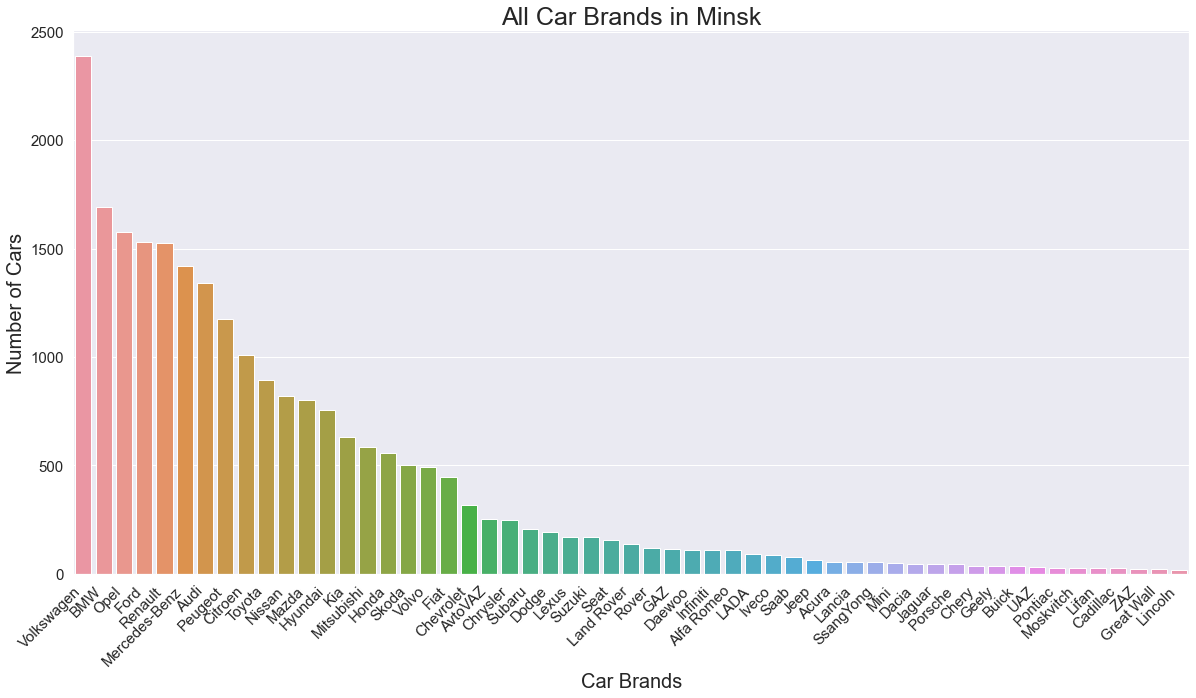

In [40]:
# Display all car brands in Minsk
# Set figure
plt.figure(figsize=(20,10))
# Display a countplot
sns.countplot(x='Brand',data=dfCars, order=dfCars['Brand'].value_counts().index)
# Set ticks for x and y axis
plt.xticks(rotation=45,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis, and title
plt.xlabel('Car Brands',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('All Car Brands in Minsk',fontsize=25)
# Show the plot
plt.show()

**This is difficult to see. Let's zoom into the top 10 brands listed in the catalog.**

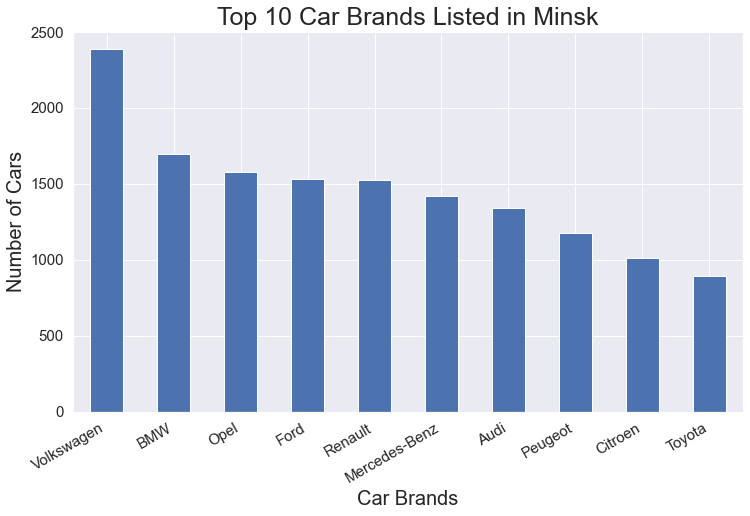

In [41]:
# Display the top 10 car brands
# Set figure
plt.figure(figsize=(12,7))
# Display a bar plot
dfCars['Brand'].value_counts().head(10).plot(kind='bar')
# Set ticks for x and y axis
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis, and title
plt.xlabel('Car Brands',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Top 10 Car Brands Listed in Minsk',fontsize=25)
# Show the plot
plt.show()

**Volkswagen is the top car brand listed in Minsk.**

### Let's examine the Volkswagen brand because it has the highest number of cars listed in the Minsk region

In [42]:
# Find all the rows that are have Volkswagen brand name  
df_brand = dfCars.loc[dfCars['Brand'] == 'Volkswagen']
# Use len() to show the number of rows in the dataframe df_brand
len(df_brand)

2386

**Let's drop all car brands that are not Volkswagen**

In [43]:
# Drop all the rows that do NOT match Volkswagen as the brand
dropindex=dfCars[(dfCars['Brand'] != 'Volkswagen')].index
dfCars.drop(dropindex, inplace=True)

In [44]:
# Confirm we have only Volkswagen cars in our dataframe dfCars
dfCars["Brand"].value_counts().to_frame()

,Brand
Volkswagen,2386


### Going forward, we will focus on used Volkwagens in Minsk region of Belarus

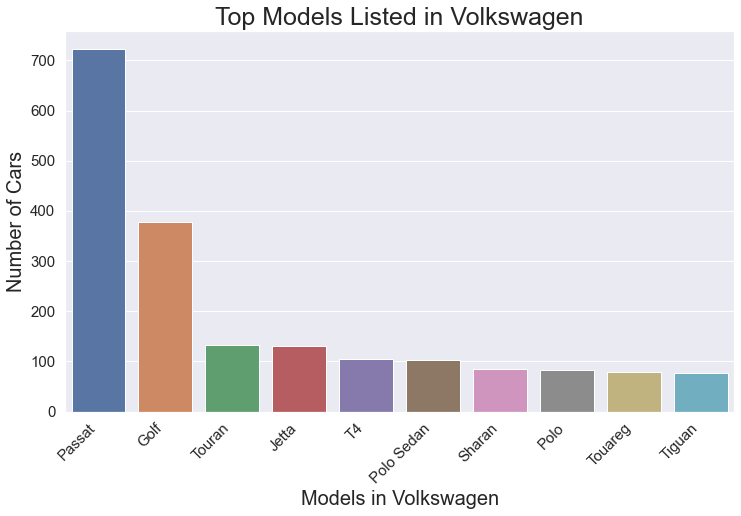

In [45]:
# Display the top 10 car models
# Set figure
plt.figure(figsize=(12,7))
# Display a countplot
sns.countplot(x='Model',data=dfCars, order=dfCars['Model'].value_counts().head(10).index)
# Set ticks for x and y axis
plt.xticks(rotation=45,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis, and title
plt.xlabel('Models in Volkswagen',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Top Models Listed in Volkswagen',fontsize=25)
# Show the plot
plt.show()

**The top models listed for Volkswagen are Passat and Golf.**

<font size=4, color='blue'>Which body type and color has the highest listing?</font>

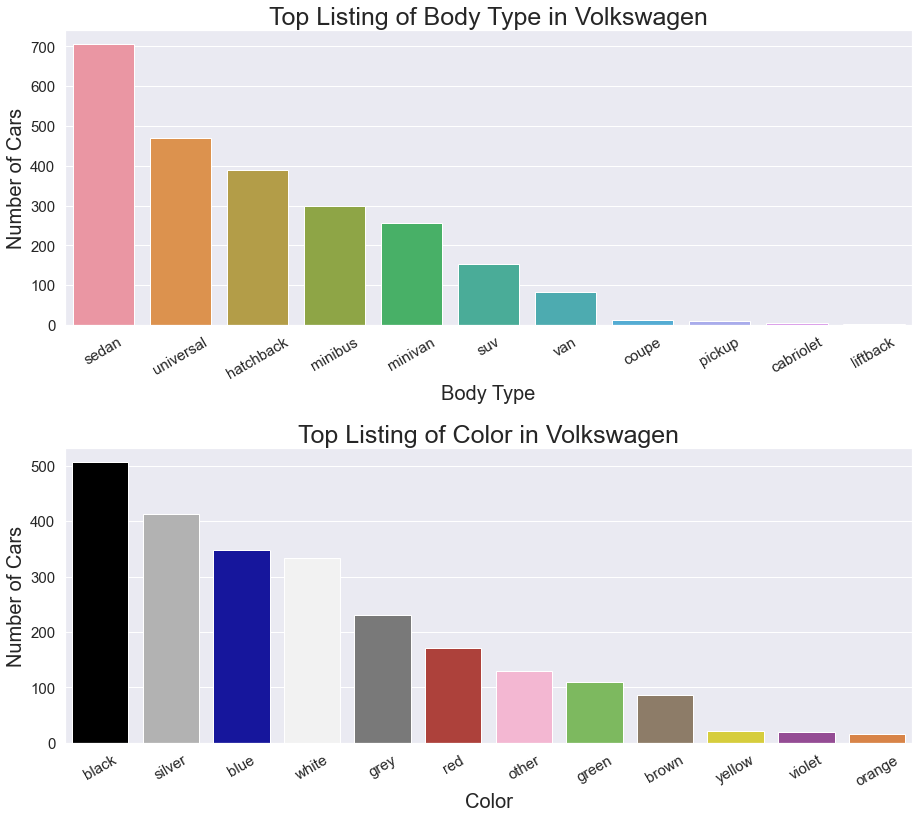

In [46]:
#Set figure to plot 2 graphs
fig, ax =plt.subplots(nrows=2, figsize=(15,13))
fig.tight_layout(pad=10)
#Plot graph for Body Type
g4 = sns.countplot(x='Body Type',data=dfCars, order=dfCars['Body Type'].value_counts().index,ax=ax[0])
# Set labels for x and y axis
g4.set_title('Top Listing of Body Type in Volkswagen', fontsize=25)
g4.set_xlabel('Body Type',fontsize=20)
g4.set_ylabel('Number of Cars',fontsize=20)
# Set ticks for x and y axis, and title
g4.tick_params(axis='x',labelsize=15,labelrotation=30)
g4.tick_params(axis='y',labelsize=15)

#Plot graph for Color Type
#Create color palette
colors_types =['#000000',  # Black
               '#B2B2B2',  # Silver
               '#0000B2',  # Blue
               '#F2F2F2',  # White
               '#797979',  # Grey
               '#C03028',  # Red
               '#fdadd1',  # Other
               '#78C850',  # Green
               '#937D62',  # Brown
               '#EFE324',  # Yellow
               '#A040A0',  # Violet 
               '#F08030',  # Orange
              
                   ]
# Display a countplot
g5 = sns.countplot(x='Color',data=dfCars, order=dfCars['Color'].value_counts().index,palette=colors_types,ax=ax[1])
# Set labels for x and y axis
g5.set_xlabel('Color',fontsize=20)
g5.set_ylabel('Number of Cars',fontsize=20)
g5.set_title('Top Listing of Color in Volkswagen', fontsize=25)
# Set ticks for x and y axis, and title
g5.tick_params(axis='x',labelsize=15,labelrotation=30)
g5.tick_params(axis='y',labelsize=15)

# Show the plots            
plt.show()

**Sedan has the highest listing for body type followed by universal, and hatchback.** <br> 
**The color black has the highest listing followed by silver and blue.**

<font size=4, color='blue'>Which transmission, fuel type, and drive-wheel has the highest listing?</font>

**Let's first look at Transmission, Fuel Type and Drive-Wheel**

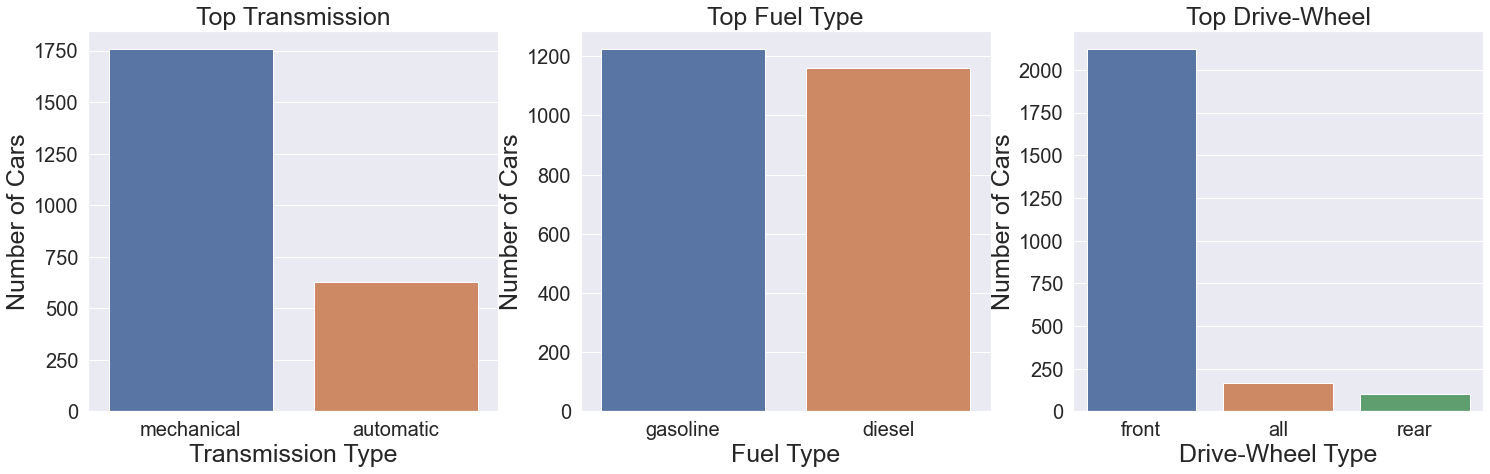

In [47]:
#Set figure to plot 3 graphs
fig, axs = plt.subplots(ncols=3, figsize=(25,7))

# Display a countplot for transmission
g1 = sns.countplot(x='Transmission',data=dfCars, order=dfCars['Transmission'].value_counts().index,ax=axs[0])
# Set labels for x and y axis, and title
g1.set_xlabel('Transmission Type',fontsize=25)
g1.set_ylabel('Number of Cars',fontsize=25) 
g1.set_title('Top Transmission', fontsize=25)
# Set ticks parameters for x and y axis
g1.tick_params(labelsize=20)

# Display a countplot for Fuel Type
g2 = sns.countplot(x='Fuel Type',data=dfCars,order=dfCars['Fuel Type'].value_counts().index,ax=axs[1])
# Set labels for x and y axis, and title
g2.set_xlabel('Fuel Type',fontsize=25)
g2.set_ylabel('Number of Cars',fontsize=25) 
g2.set_title('Top Fuel Type', fontsize=25)
# Set ticks parameters for x and y axis
g2.tick_params(labelsize=20)

# Display a countplot for Drive-Wheel
g3 = sns.countplot(x='Drive-Wheel',data=dfCars, order=dfCars['Drive-Wheel'].value_counts().index,ax=axs[2])
# Set labels for x and y axis, and title
g3.set_xlabel('Drive-Wheel Type',fontsize=25)
g3.set_ylabel('Number of Cars',fontsize=25) 
g3.set_title('Top Drive-Wheel', fontsize=25)
# Set ticks parameters for x and y axis
g3.tick_params(labelsize=20)


#Display plots
plt.show()

#### The top listing in:
 - **Transmission - Mechanical** <br>
 - **Fuel Type - Gasoline** <br>
 - **Drive-Wheel - Front Wheel** <br>

# Pivoting

**To pivot, we will change object data type to category**

In [48]:
#Change the data type of categorical columns from object to category

dfCars['Brand']= dfCars['Brand'].astype('category')
dfCars['Model']= dfCars['Model'].astype('category')
dfCars['Transmission']= dfCars['Transmission'].astype('category')
dfCars['Color']= dfCars['Color'].astype('category')
dfCars['Fuel Type']= dfCars['Fuel Type'].astype('category')
dfCars['Body Type']= dfCars['Body Type'].astype('category')
dfCars['Drive-Wheel']= dfCars['Drive-Wheel'].astype('category')

#Check data type changes
dfCars.dtypes

Brand                       category
Model                       category
Transmission                category
Color                       category
Odometer                       int64
Year                           int64
Fuel Type                   category
Engine Capacity (liters)     float64
Body Type                   category
Drive-Wheel                 category
Price (USD)                  float64
Region                        object
Number of Photos               int64
Number of Views                int64
Number of Days Listed          int64
Age of Car                     int64
dtype: object

<font size=4, color='blue'>What are the average prices per body type?</font>

In [49]:
# Create a groupby variable called df_Body for average price per Body Type
dfBody=dfCars[['Body Type','Price (USD)']]
# Find the average price of Body Type using groupby 
df_BodyGrp=dfBody.groupby(['Body Type']).mean()
# Display dataframe df_BodyGrp
df_BodyGrp

,Price (USD)
Body Type,
cabriolet,6825.000000
coupe,4623.923077
hatchback,3978.722538
liftback,9283.000000
minibus,10785.255351
minivan,9069.957852
pickup,11119.800000
sedan,6436.968681
suv,14488.503791


**Let's visualize a graph that shows average price per body type**

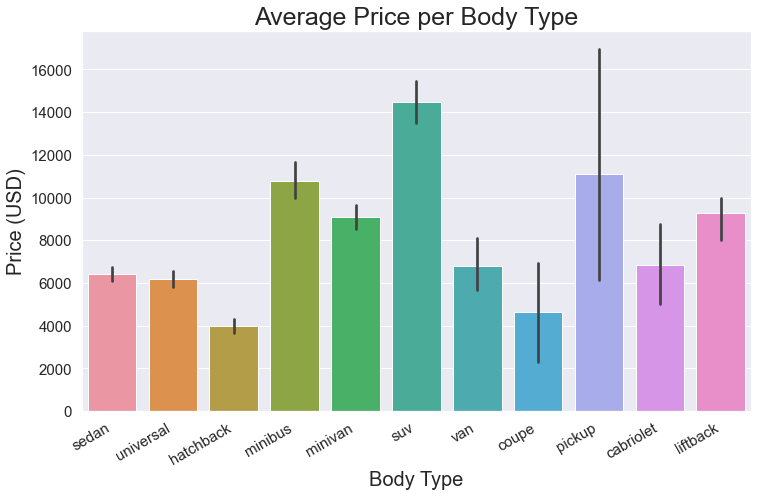

In [50]:
# Display a plot for average price of cars per body type
# Set figure
fig =plt.figure(figsize=(12,7))
# Set style for the plot
sns.set_style('darkgrid')
# Display a barplot
sns.barplot(x='Body Type', y='Price (USD)', order=dfCars['Body Type'].value_counts().index, data=dfCars)
# Set ticks for x and y axis, and title
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Price (USD)',fontsize=20)
plt.title('Average Price per Body Type',fontsize=25)
# Show the plot
plt.show()

**We observe that Sedans and Universals have the highest listing in the catalog, however, their average prices are much lower than the SUVs, which have the highest average price.**

**Let's examine prices of Body Type based on Fuel Type.**

In [51]:
# Create a pivot table called pivot_body
pivot_body=pd.pivot_table(dfCars, index='Body Type', columns='Fuel Type', values='Price (USD)').fillna(0)
# Display pivot table
pivot_body

Fuel Type,diesel,gasoline
Body Type,,
cabriolet,0.000000,6825.000000
coupe,0.000000,4623.923077
hatchback,4006.801125,3971.476452
liftback,0.000000,9283.000000
minibus,10818.351779,10268.583333
minivan,9454.586580,7891.650794
pickup,11799.777778,5000.000000
sedan,6015.201895,6553.871431
suv,14286.402778,14668.149136


**Average price of SUVs and Minibus are much higher than the rest of the listed cars.**

**Let's visualize this**

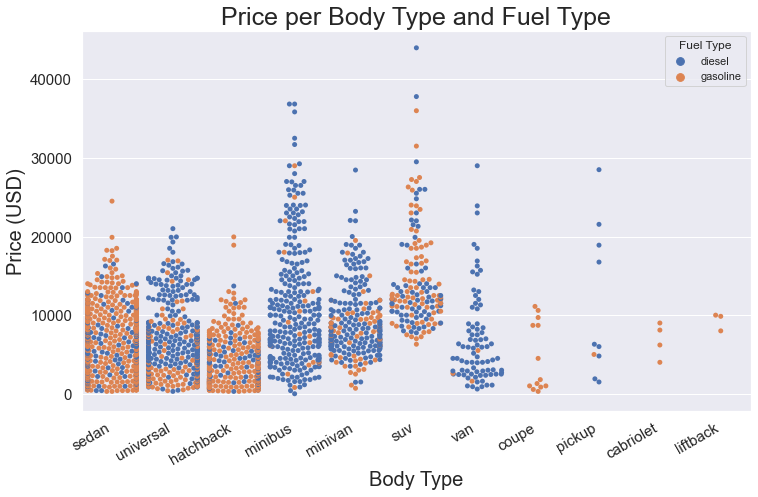

In [52]:
# Display a plot for Price per Body Type and Fuel Type
# Set figure
fig =plt.figure(figsize=(12,7))
# Display a swarmplot
sns.swarmplot(x='Body Type', y='Price (USD)', data=dfCars,order=dfCars['Body Type'].value_counts().index, hue='Fuel Type')
# Set ticks for x and y axis, and title
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Price (USD)',fontsize=20)
plt.title('Price per Body Type and Fuel Type',fontsize=25)
# Show the plot
plt.show()

**SUV's and Minibus body type has more outliers that are higher in price. When comparing fuel types, diesel cars have a higher price than gasoline cars. We will explore this in our hypothesis.**

**Let's examine prices of Body Type based on type of Transmission.**

In [53]:
# Create a pivot table called pivot_trans 
pivot_trans=pd.pivot_table(dfCars, index='Body Type', values='Price (USD)',columns='Transmission').fillna(0)
pivot_trans

Transmission,automatic,mechanical
Body Type,,
cabriolet,4000.000000,7766.666667
coupe,9762.200000,1412.500000
hatchback,6825.372881,3471.313565
liftback,8924.500000,10000.000000
minibus,20658.769444,9433.747719
minivan,9324.030877,8997.183166
pickup,25025.000000,7643.500000
sedan,8818.343130,5160.676492
suv,14890.276218,13082.300294


**Used cars with automatic transmission generally have a higher average price than the used cars with mechanical transmission.**

**Let's visualize this**

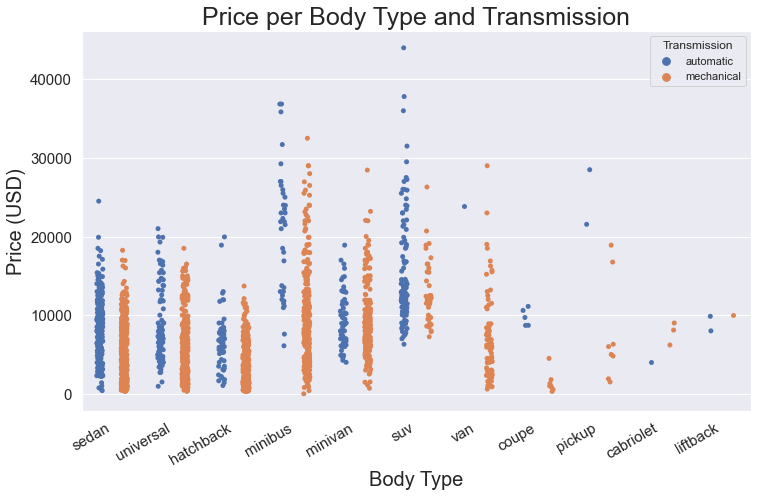

In [54]:
# Display a plot for Price per Body Type and Transmission
# Set figure
# Set figure
fig =plt.figure(figsize=(12,7))
# Display a stripplot
sns.stripplot(x='Body Type', y='Price (USD)', data=dfCars,order=dfCars['Body Type'].value_counts().index, hue='Transmission', jitter=True, split=True)
# Set ticks for x and y axis
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis, and title
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Price (USD)',fontsize=20)
plt.title('Price per Body Type and Transmission',fontsize=25)
# Show the plot
plt.show()

**Suv's and Minibus with automatic tranmission are more expensive than rest of the cars. Sedans and Universal cars have similar price range for both automatic and mechanical transmission type.**

# Descriptive Statistics

In [55]:
dfCars.describe()

,Odometer,Year,Engine Capacity (liters),Price (USD),Number of Photos,Number of Views,Number of Days Listed,Age of Car
count,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,261318.196563,2003.492875,1.882020,7354.033659,10.150461,15.594719,73.052389,16.507125
std,139445.677320,8.670545,0.419073,5587.191908,6.272464,44.745931,96.624012,8.670545
min,1.000000,1976.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,170000.000000,1997.000000,1.600000,3012.500000,6.000000,2.000000,21.000000,10.000000
50%,255000.000000,2005.000000,1.900000,6600.000000,9.000000,5.000000,57.000000,15.000000
75%,335000.000000,2010.000000,2.000000,10000.000000,13.000000,15.000000,88.000000,23.000000
max,1000000.000000,2019.000000,6.000000,43999.000000,86.000000,1271.000000,2232.000000,44.000000


**Volkswagen is the brand that has the outliers in the odometer, price, and number of days listed columns. The range has remained the same for all three columns.**

In [56]:
# Display an interactive boxplot for the Price column
# Set figure
fig =plt.figure(figsize=(12,7))
dfCars[['Price (USD)']].iplot(kind='box')

<Figure size 864x504 with 0 Axes>

**The Max:43,999<br>Q3:10k<br>Median:6600<br>Q1:3012<br>Min:1**

# Quantitative Exploratory Analysis

## Function (3)

### Empirical Cumulative Distribution Function (ECDF)

In [57]:
# Create a function for ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points or observations: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [58]:
#let us generate dataframe for each Drive-Wheel
dfCars_all= dfCars.loc[dfCars['Drive-Wheel'] == 'all']
dfCars_front= dfCars.loc[dfCars['Drive-Wheel'] == 'front']
dfCars_rear= dfCars.loc[dfCars['Drive-Wheel'] == 'rear']

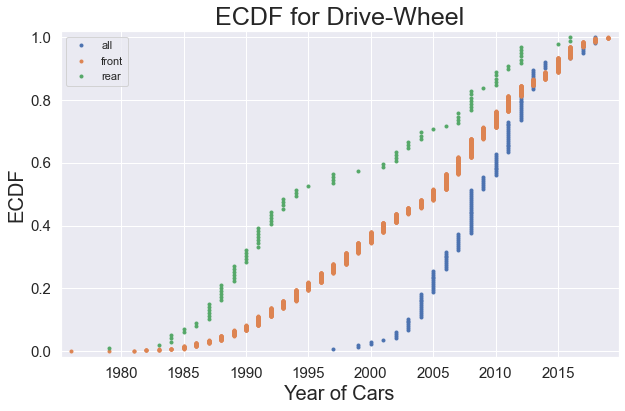

In [59]:
# Compute ECDFs passing the different data for the different states

# Compute x and y for Drive-Wheel by calling the ecdf function and passing the variables
x_all, y_all = ecdf(dfCars_all['Year'])
x_front, y_front = ecdf(dfCars_front['Year'])
x_rear, y_rear = ecdf(dfCars_rear['Year'])

# Plot all ECDFs on the same plot
# Set figure
fig =plt.figure(figsize=(10,6))
_ = plt.plot(x_all, y_all, marker = '.', linestyle = 'none')
_ = plt.plot(x_front, y_front, marker = '.', linestyle = 'none')
_ = plt.plot(x_rear, y_rear, marker = '.', linestyle = 'none')

# Keep data off plot edges
plt.margins(0.02)

# Set legend, x and y label, and title
plt.legend(('all', 'front','rear'), loc='upper left')
_ = plt.xlabel('Year of Cars',fontsize=20)
_ = plt.ylabel('ECDF',fontsize=20)
_ = plt.title('ECDF for Drive-Wheel',fontsize=25)

# Set the ticks for x and y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.show()

**Approximately: <br>
70% of rear wheel drive cars are before year 2005<br>
48-52% of front wheel drive cars are before year 2005<br>
19-26% of all wheel drive cars are before year 2005**

<font size=4, color='blue'>What is the range of the price and the age of the cars listed?</font>

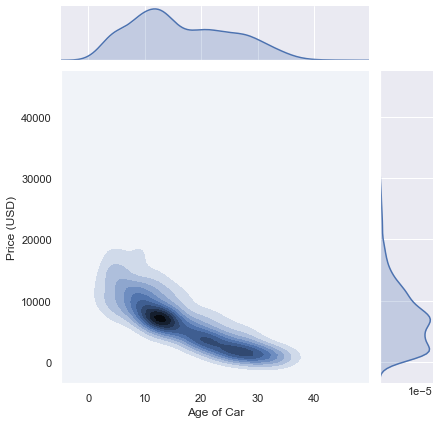

In [60]:
# Display a plot for Age of Car (in years) and Price 
sns.jointplot(x="Age of Car", y="Price (USD)", data=dfCars,kind='kde')
#plt.ylim(0,25000)

**The darkest region of the plot shows that majority of the cars are between 7 and 15 years old with prices ranging from 5000 USD to 8000 USD. The second highest density range is from 20 to 30 years old with price ranging between 1000 USD t0 4000 USD.**

# Correlation

**Let's examine the correlation between all the numerical columns**

In [61]:
# Show the correlation between all the numerical columns
Car_corr = dfCars.corr()
Car_corr

,Odometer,Year,Engine Capacity (liters),Price (USD),Number of Photos,Number of Views,Number of Days Listed,Age of Car
Odometer,1.000000,-0.501049,0.227061,-0.369008,-0.123005,-0.034134,-0.014370,0.501049
Year,-0.501049,1.000000,-0.037070,0.764254,0.280033,0.036220,0.023217,-1.000000
Engine Capacity (liters),0.227061,-0.037070,1.000000,0.213431,0.090753,0.027682,0.048747,0.037070
Price (USD),-0.369008,0.764254,0.213431,1.000000,0.325514,0.061036,0.052243,-0.764254
Number of Photos,-0.123005,0.280033,0.090753,0.325514,1.000000,0.059982,-0.061512,-0.280033
Number of Views,-0.034134,0.036220,0.027682,0.061036,0.059982,1.000000,0.775140,-0.036220
Number of Days Listed,-0.014370,0.023217,0.048747,0.052243,-0.061512,0.775140,1.000000,-0.023217
Age of Car,0.501049,-1.000000,0.037070,-0.764254,-0.280033,-0.036220,-0.023217,1.000000


**Let's visualize this**

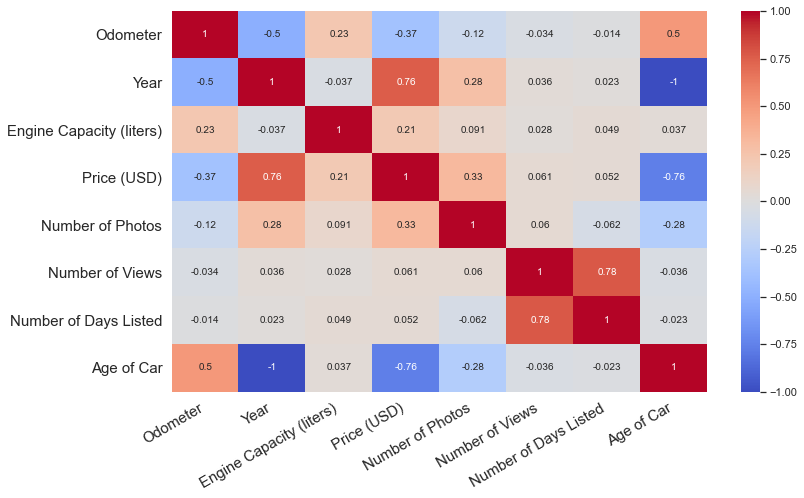

In [62]:
# Display heatmap showing correlation of numerical data
# Set figure
fig =plt.figure(figsize=(12,7))
# Display a heatmap
sns.heatmap(Car_corr, cmap='coolwarm', annot=True)
# Set ticks for x and y axis
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()

**There is positive correlation between: <br>
Number of Views and Number of Days Listed (Moderate ~0.78)<br>
Age of Car and Odometer (Moderate ~0.5)<br><br>
There is a negative correlation between:<br>
Age of Car and Price (Moderate ~ -0.76)**

<font size=2, color='green'>
These are the guidelines for the p-value <br>    
If p-value is < 0.001: there is strong evidence that the correlation is significant. <br> 
If p-value is < 0.05 : there is moderate evidence that the correlation is significant. <br>
If p-value is < 0.1  : there is weak evidence that the correlation is significant.  <br>
If p-value is > 0.1  : there is no evidence that the correlation is significant.</font>

<font size=4, color='blue'>Is there a correlation between the Age of Car and Price?</font>

(0.0, 46532.91058370415)

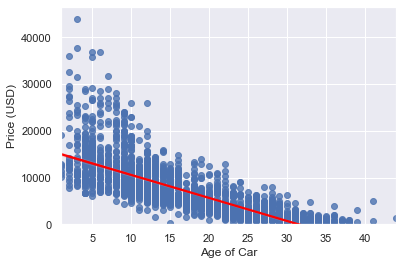

In [63]:
# Display a plot for correlation between Age of Car and Price
sns.regplot(x='Age of Car',y='Price (USD)',data=dfCars,line_kws={'color':'red'})
#Set y limit
plt.ylim(0,)

In [64]:
# Check Pearson correlation and p-value for Age of Car and Price
pearson_coef, p_value = stats.pearsonr(dfCars['Age of Car'], dfCars['Price (USD)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " \nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7642536678302618  
with a P-value of P = 0.0


**Since the p-value is zero, there is weak evidence that the correlation is significant between Age of Car and Price. The linear relationship is moderately negative.**

<font size=4, color='blue'>Do expensive cars have more Number of Photos?</font>

(0.0, 46198.9)

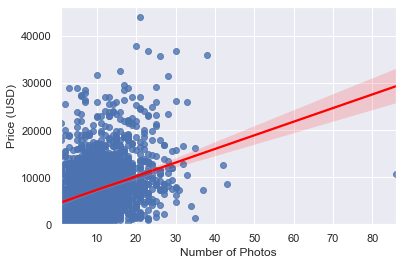

In [65]:
# Display a plot for correlation between Age of Car and Price
sns.regplot(x='Number of Photos',y='Price (USD)',data=dfCars,line_kws={'color':'red'})
#Set y limit
plt.ylim(0,)

In [66]:
# Check Pearson correlation and p-value for Number of Photos and Price
pearson_coef, p_value = stats.pearsonr(dfCars['Number of Photos'], dfCars['Price (USD)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " \nwith a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.32551388369972556  
with a P-value of P = 5.212495234415945e-60


**Since the p-value is extremely small, there is strong evidence that the correlation is significant between
Number of Photos and Price but linear relationship is weak.**

<font size=4, color='blue'>Does having more online photos lead to more views?</font>

<Figure size 1800x1080 with 0 Axes>

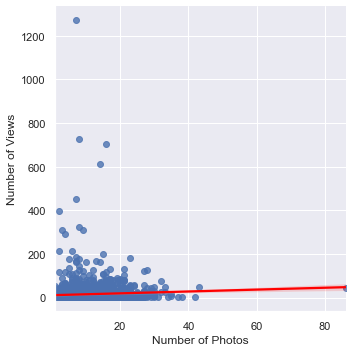

In [67]:
# Display a plot for correlation between Number of Photos and Number of Views
# Set figure
fig =plt.figure(figsize=(25,15))
# Display lmplot
sns.lmplot(data=dfCars, x='Number of Photos', y='Number of Views',legend=True,line_kws={'color':'red'})

### Correlation Matrix: Function (4)

In [68]:
#define a function name it pearson_r that will take two arguments x and y
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
   
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    
    # Return entry [0,1]
    return corr_mat[0,1]
    
# Compute Pearson correlation coefficient for Number of Photos and Number of Views
r = pearson_r(dfCars["Number of Photos"], dfCars["Number of Views"])

# Print the result
print(r)

      

0.059982089890152954


In [69]:
# Check Pearson correlation and p-value for Number of Photos and Number of Views
pearson_coef, p_value = stats.pearsonr(dfCars['Number of Photos'], dfCars['Number of Views'])
print("The Pearson Correlation Coefficient is", pearson_coef, " \nwith a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.059982089890154036  
with a P-value of P = 0.003378390905014953


**Since the p-value is small (.003), there is moderate evidence that the correlation is significant between Number of Photos and Number of Views. The linear relationship is very weak or non-existent.**

<font size=4, color='blue'>If Number of Views increase, do the Number of Days Listed decrease?</font>

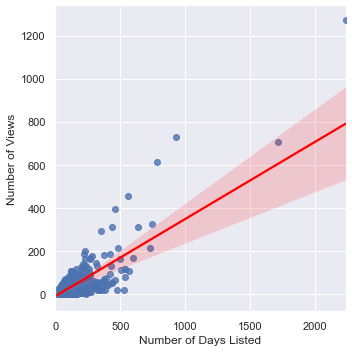

In [70]:
# Display lmplot
sns.lmplot(x='Number of Days Listed',y='Number of Views',data=dfCars,line_kws={'color':'red'})

In [71]:
# Check Pearson correlation and p-value
pearson_coef, p_value = stats.pearsonr(dfCars['Number of Views'], dfCars['Number of Days Listed'])
print("The Pearson Correlation Coefficient is", pearson_coef, " \nwith a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.7751395787053006  
with a P-value of P = 0.0


**Since the p-value is zero, there is weak evidence that the correlation is significant between Number of Days Listed and Number of Views, however the linear relationship is strong (~0.775). The Number of Views could be higher for cars that are listed in the catalog longer duration.**

# ANOVA

**Information on ANOVA<br><br>
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences 
between the means of two or more groups.<br><br>
ANOVA returns two parameters:**<br><br>
**1) F-test score: ANOVA assumes the means of all groups are the same, it calculates how much the actual means deviate 
from the assumption, and reports it as the F-test score.<br> 
A larger score means there is a larger difference between the means.**<br><br>
**2) P-value: P-value tells how statistically significant is our calculated score value.<br>
If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable 
F-test score and a small p-value.**

<font size=4, color='blue'>Is there a relationship between the type of trasmission and the price of the car?</font>

### We will use Analysis of Variance (ANOVA) to examine the relationship between Tranmission and Price of a car.

In [72]:
# Pivot Transmission and Price
pd.pivot_table(dfCars,index='Transmission',values='Price (USD)')

,Price (USD)
Transmission,
automatic,10550.810669
mechanical,6212.067810


In [73]:
# Extract Transmission and Price of Car data
df_anova = dfCars[['Transmission', 'Price (USD)']]

grouped_anova = df_anova.groupby(['Transmission'])

In [74]:
# The ANOVA test uses the f_oneway method as the built-in function of the scipy package. 
# We pass in the Price data of the two Transmission groups (automatic and mechanical) we want to #compare, 
# and it calculates the ANOVA results.

anova_r1 = stats.f_oneway(grouped_anova.get_group("automatic")["Price (USD)"], grouped_anova.get_group("mechanical")["Price (USD)"])
print( "ANOVA results: F=",anova_r1)                                                                                                             

ANOVA results: F= F_onewayResult(statistic=315.86572582516607, pvalue=1.8492173230260734e-66)


**The prices between Automatic and Mechanical Transmission are significantly different, as the F-test score is very large and the p-value is extremely small because it has an exponent of -66, which indicates that there is strong evidence there is significant correlation between Transmission Type and Price.**

# Hypothesis Testing

<font size=4, color='blue'>Are the diesel car prices significiantly higher or lower than the gasoline car prices?</font>

## Normal Distribution Test

**Null Hypothesis ($\begin{align} & {{H}_{0}} \end{align}$): Distribution of prices is Normal**

**Alternate Hypothesis: ($\begin{align} & {{H}_{1}} \end{align}$): Distribution of prices is Not Normal**


In [75]:
#Import required libraries
from scipy.stats import normaltest
import scipy.stats as stats

In [76]:
#Test for normal distribution of prices
Norm_stat, Norm_p = stats.normaltest(dfCars["Price (USD)"])

#print stat and p-value
print("\n Test Statistic = {:.3f}    P-Value  ={}\n".format(Norm_stat, Norm_p))


 Test Statistic = 704.163    P-Value  =1.2388634637532277e-153



**Since the p-value is extremely small, we will reject the null hypothesis. The price of the cars is not normally distributed.**

**Let's check this visually**

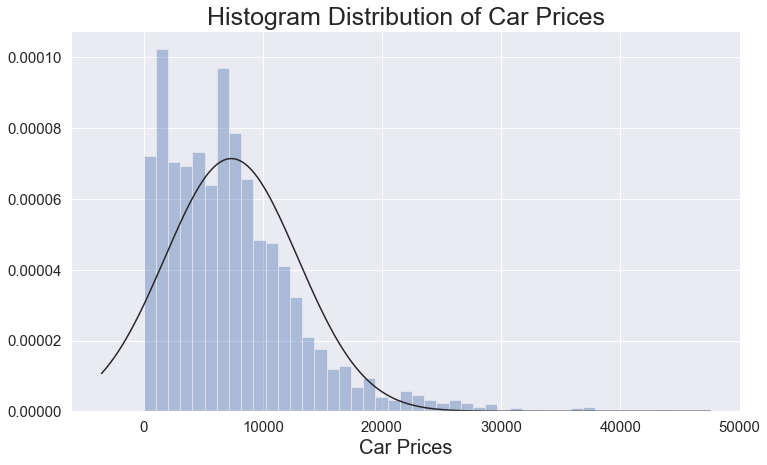

In [77]:
# Display a plot to show the distribution of price
# Set figure
fig =plt.figure(figsize=(12,7))
# Display a distplot
sns.distplot(dfCars['Price (USD)'],fit=stats.norm,kde=False)
# Set ticks for x and y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Set label for x axis and title
plt.xlabel('Car Prices',fontsize=20)
plt.title('Histogram Distribution of Car Prices',fontsize=25)
# Show the plot
plt.show()

**The graph confirms the car prices are not normally distributed because this graph is skewed to the left, means that it is positively skewed.**

### Let's check if the price of diesel cars is normally distributed

In [78]:
#Create a dataframe of diesel prices using filtering of columns
diesel_price = dfCars[dfCars['Fuel Type'] == 'diesel']['Price (USD)']

#Display the head of this dataframe
diesel_price.head()

15075    23500.0
15080    23150.0
15081     3400.0
15083     4650.0
15084     2990.0
Name: Price (USD), dtype: float64

In [79]:
#Test for normal distribution of prices
Norm_stat, Norm_p = stats.normaltest(diesel_price)

#print stat and p-value
print("\n Test Statistic = {:.3f}    P-Value  ={}\n".format(Norm_stat, Norm_p))


 Test Statistic = 361.803    P-Value  =2.725393479985047e-79



**Let's check this visually**

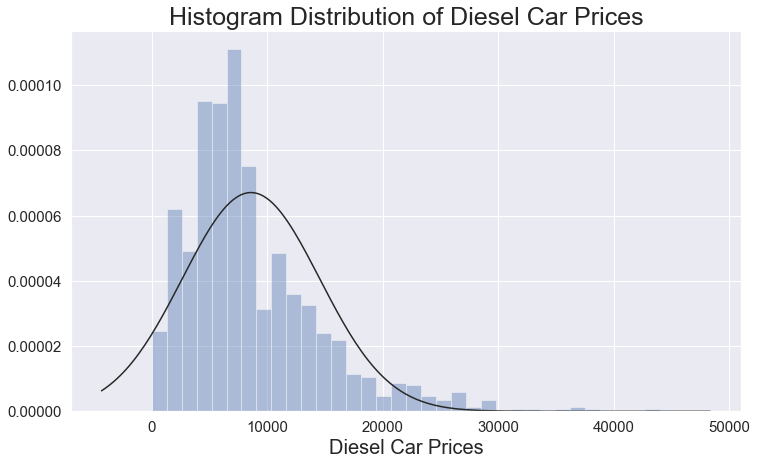

In [80]:
# Display a plot to show the distribution of price
# Set figure
fig =plt.figure(figsize=(12,7))
# Display a distplot
sns.distplot(diesel_price,fit=stats.norm,kde=False)
# Set ticks for x and y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Set label for x axis and title
plt.xlabel('Diesel Car Prices',fontsize=20)
plt.title('Histogram Distribution of Diesel Car Prices',fontsize=25)
# Show the plot
plt.show()

**The graph confirms the diesel car prices are not normally distributed because this graph is skewed to the left, means that it is positively skewed.**

### Let's also check if the price of gasoline cars is normally distributed

In [81]:
#Create a dataframe of gasoline prices using filtering of columns
gasoline_price=dfCars[dfCars['Fuel Type'] == 'gasoline']['Price (USD)']

#Display the head of this dataframe
gasoline_price.head()

15076    6300.0
15078     650.0
15079    9350.0
15085    5750.0
15088    1480.0
Name: Price (USD), dtype: float64

In [82]:
#Test for normal distribution of prices
Norm_stat, Norm_p = stats.normaltest(gasoline_price)

#print stat and p-value
print("\nStatistic = {:.3f}    P-Value  ={}\n".format(Norm_stat, Norm_p))


Statistic = 299.616    P-Value  =8.693940306789758e-66



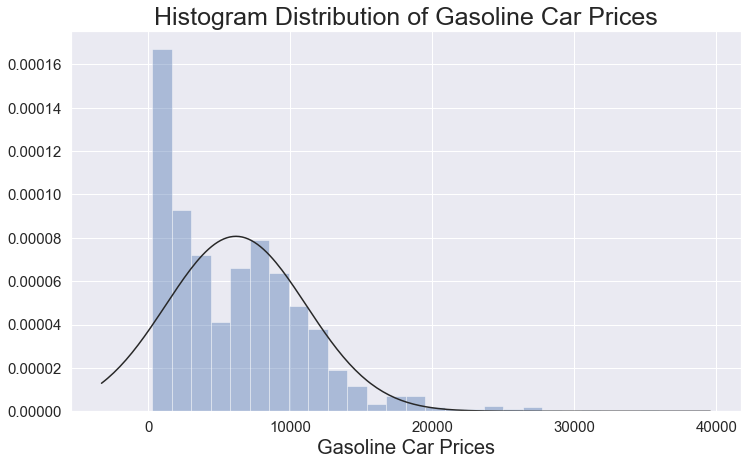

In [83]:
# Display a plot to show the distribution of price
# Set figure
fig =plt.figure(figsize=(12,7))
# Display a distplot
sns.distplot(gasoline_price,fit=stats.norm,kde=False)
# Set ticks for x and y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Set label for x axis and title
plt.xlabel('Gasoline Car Prices',fontsize=20)
plt.title('Histogram Distribution of Gasoline Car Prices',fontsize=25)
# Show the plot
plt.show()

**The graph confirms the gasoline car prices are not normally distributed because this graph is skewed to the left, means that it is positively skewed.**

## Levene Test

**Levene’s test is used to check that variances are equal for all samples when your data comes from a non-normal distribution. We will use Levene’s test to check the assumption of equal variances before our hypothesis test.**

**Levene Test recommends using:<br>
 ‘median’ for skewed (non-normal) distributions<br>
 ‘mean’   for symmetric, moderate-tailed distributions<br>
 ‘trimmed’ for heavy-tailed distributions**

**Check the variability visually**

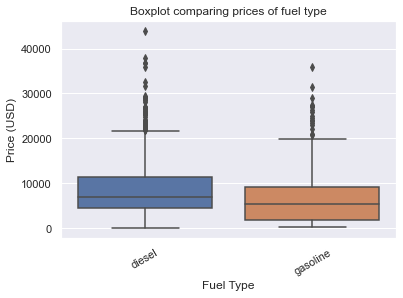

In [84]:
#Plot graph to display variance
plt.title('Boxplot comparing prices of fuel type')
sns.boxplot(x='Fuel Type', y='Price (USD)', data=dfCars)
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=30)
plt.show()

**The variability between median for diesel and gasoline prices look almost equal. However, they have outliers and their median or quartiles are not at the same price point.** 

In [85]:
# Find the median of all diesel cars
diesel_med = dfCars[dfCars['Fuel Type'] == 'diesel']['Price (USD)'].median()

print("Diesel median:",diesel_med)
# Find the med of all gasoline cars
gas_med = dfCars[dfCars['Fuel Type'] == 'gasoline']['Price (USD)'].median()
print("Gasoline median:",gas_med)

Diesel median: 7000.0
Gasoline median: 5500.0


**The difference in median price is 1500 USD. We will use Levene’s test to check the assumption of equal variances.**

**Null Hypothesis:<br> 
Variance of diesel car prices Is Equal to variance of gasoline car prices**<br>

$\begin{align}
  & {{H}_{0}}:\,\,\sigma _{1}^{2}\,=\,\,\sigma _{2}^{2} \\ 
 & {{H}_{1}}:\,\,\sigma _{1}^{2}\,\ne \,\,\sigma _{2}^{2} \\ 
\end{align}$

**Alternate Hypothesis:<br>
Variance of diesel car prices Is Not Equal to variance of gasoline prices**

In [86]:
# This is a Levene Test using the median price
# Import required libraries
import scipy.stats as stats
from statsmodels.stats.weightstats import CompareMeans 

#Levene test for comparing variance between diesel and gasoline prices
(test_stat, vp_value) = stats.levene(diesel_price, gasoline_price, center='median' )

#Display statistic and p-value
print("\nStatistic = {:.3f}    P-Value = {}\n".format(test_stat, vp_value))


Statistic = 3.040    P-Value = 0.08136604377615733



In [87]:
# Levene Test p-value
if vp_value < 0.05:
   print("We reject null hypothesis in favor of alternate hypothesis")
else:
   print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Conclusion of Levene test: 
**Since the p-value is greater than alpha level of 0.05, therefore, we fail to reject the null hypothesis. This means that the variance of diesel and gasoline prices is probably equal.**

# Z-test

**We are doing a z-test instead of a t-test because our sample 
size is greater than 30. We want to test a hypothesis for the mean of diesel and gasoline prices and see whether they are equal or not.**

**To check the mean and standard deviation of the fuel types (diesel and gasoline) we will aggregate the dataframe by using grouby()**

In [88]:
# Group data frame by fuel type and price
bygroup = dfCars.groupby(['Fuel Type'])['Price (USD)']

#Calcuate the count of each fuel type catergory and the mean/standard deviation of price for each type
bygroup.aggregate(['count',np.mean,np.std,np.median]).round(2)

,count,mean,std,median
Fuel Type,,,,
diesel,1161,8588.38,5948.11,7000.0
gasoline,1225,6184.18,4947.91,5500.0


**It seems that the mean of diesel prices is higher than the mean of gasoline prices. We will test this result in our hypothesis to check if this result is statistically significant or due to chance alone.**

### When Standard deviations of the population are either assumed to be: 
**Equal, then use: usevar=pooled** <br> 
**Unequal, then use: usevar=unequal**

**Since the standard deviation is unequal for both diesel and gasoline car prices, we will use usevar=unequal in our test**

## Hypothesis Test (Two-Tailed or Two-Sided)

**Null Hypothesis:<br> 
Mean of diesel car prices Is Equal to mean of gasoline car prices**<br>

$\begin{align}
 & {{H}_{0}}:\,{{\mu }_{1}}\,=\,{{\mu }_{2}} \\
 & {{H}_{1}}:\,{{\mu }_{1}}\,\ne \,{{\mu }_{2}} \\ 
\end{align}$

**Alternate Hypothesis:<br>
Mean of diesel car prices Is Not Equal to mean of gasoline prices**

In [89]:
# This is a Two-tailed test

# Import library for comparing means
from statsmodels.stats.weightstats import CompareMeans 

#Z-Test for comparing means
(Two_tstat, Two_p_value)= CompareMeans.from_data(diesel_price,
                                                 gasoline_price).ztest_ind(alternative='two-sided',
                                                                   usevar='unequal',
                                                                   value=0)

#print the test statistic and p-value
print("\nStatistic = {:.3f}    P-Value  ={}\n".format(Two_tstat, Two_p_value))


Statistic = 10.703    P-Value  =9.862912692624908e-27



In [90]:
# Two-Tailed Test p-value

if Two_p_value < 0.05:
   print("We reject null hypothesis in favor of alternate hypothesis")
else:
   print("We fail to reject the null hypothesis")

We reject null hypothesis in favor of alternate hypothesis


### Conclusion of Two-tailed test: 
**Since the p-value is less than alpha level of 0.05, we reject the null hypothesis in favor of the alternative hypothesis.<br><br>
The mean of diesel car prices Is NOT Equal to mean of gasoline car prices.<br><br>
Based on this hypothesis test online postings of diesel and gasoline Volkswagen prices are different and their price difference is not due to chance alone.**

## Hypothesis Test (Left-Tailed)

**Null Hypothesis: <br>
Mean of diesel car prices is GREATER THAN OR EQUAL to the mean of gasoline car prices**

$\begin{align}
  & {{H}_{0}}:\,{{\mu }_{1}}\, >={{\mu }_{2}} \\ 
 & {{H}_{1}}:\,{{\mu }_{1}}\, < {{\mu }_{2}} \\ 
\end{align}$

**Alternate Hypothesis:<br>
Mean of diesel car prices is LESS THAN the mean of gasoline prices**

In [91]:
# This is a Left-tailed z-test comparing means
(smaller_tstat, smaller_p_value)= CompareMeans.from_data(diesel_price, 
                                                         gasoline_price).ztest_ind(
                                                                        alternative='smaller',
                                                                        usevar='unequal',
                                                                        value=0)

#print the test statistic and p-value
print("\nStatistic = {:.3f}    P-Value  ={}\n".format(smaller_tstat, smaller_p_value))


Statistic = 10.703    P-Value  =1.0



In [92]:
# Left-Tailed Test p-value

if smaller_p_value < 0.05:
   print("We reject null hypothesis in favor of alternate hypothesis")
else:
   print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Conclusion of Left-tailed test: 
**Since the p-value (1.0) is more than alpha level of 0.05, we fail to reject the null hypothesis.<br><br>
The mean of diesel car prices is greater than or equal the mean of gasoline car prices.<br><br>
With a high p-value, we expect a right-tailed hypothesis p-value to be extremely small. Let's check!**

## Hypothesis Test (Right-Tailed)

**Null Hypothesis:<br>
Mean of diesel car prices is LESS THAN OR EQUAL to the mean of gasoline car prices**

$\begin{align}
  & {{H}_{0}}:\,{{\mu }_{1}}\, <={{\mu }_{2}} \\ 
 & {{H}_{1}}:\,{{\mu }_{1}}\, > {{\mu }_{2}} \\ 
\end{align}$

**Alternate Hypothesis:<br>
Mean of diesel car prices is GREATER THAN the mean of gasoline prices**

In [93]:
# This is a Right-tailed test

(tstat, p_value)= CompareMeans.from_data(diesel_price,
                                         gasoline_price).ztest_ind(alternative='larger',
                                                                   usevar='unequal',
                                                                   value=0)

#print the test statistic
print("\nStatistic = {:.3f}    P-Value  ={}\n".format(tstat, p_value))


Statistic = 10.703    P-Value  =4.931456346312454e-27



In [94]:
# Right-Tailed Test p-value

if p_value < 0.05:
   print("We reject null hypothesis in favor of alternate hypothesis")
else:
   print("We fail to reject the null hypothesis")

We reject null hypothesis in favor of alternate hypothesis


### Conclusion of Right-tailed test: 
**Since the p-value is less than alpha level of 0.05, we reject the null hypothesis in favor of the alternative hypothesis. <br><br> 
The mean of diesel car prices is GREATER THAN the mean of gasoline car prices.<br><br> 
Based on these 3 hypothesis tests, online postings of Volkswagen diesel cars have an average higher price than gasoline cars. This price difference is statistically significant rather than chance alone.<br><br> 
You can visually see this price difference in the barplot below.**

(0.0, 10000.0)

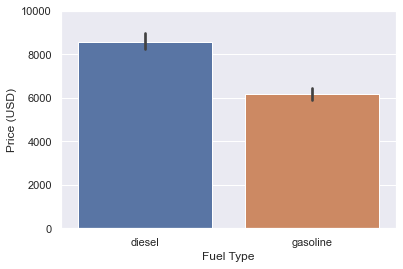

In [95]:
#Plot barplot to show the average price of diesel and gasoline cars
sns.barplot(x='Fuel Type',y='Price (USD)',data=dfCars)
plt.ylim(0,10000)

# Chi-Squared Test for Independence

<font size=4, color='blue'>Are transmission and fuel types independent or dependent?</font>

**Some information about Chi-Squared Test:**
- It tests whether two categorical variables are related or independent.
- Assumptions:
 - Observations used in the calculation of the contingency table are independent.
 - There are 25 or more examples in each cell of the contingency table.

**Ho = Fuel Type and Transmission are independent <br>
Ha = Fuel Type and Transmission are not independent.**

**We wiil use pandas.crosstable to get the frequency count from different categorical features.**

In [96]:
#Compute frequency table for color and fuel type using the crosstable method from panadas
crosstable = pd.crosstab(dfCars["Transmission"],dfCars["Fuel Type"],margins = False)
#Display crosstable
crosstable

Fuel Type,diesel,gasoline
Transmission,,
automatic,231,397
mechanical,930,828


In [97]:
# Chi-Squared test with similar proportions
# Test whether there is a relationship between transmission types or body types of used cars

from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table has 

stat, p, dof, expected = chi2_contingency(crosstable)
print('degrees of freedom=%d' % dof)
print('\n',expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('\nprobability={}, critical={}, stat={}'.format(prob, critical, stat))

if abs(stat) >= critical:
  print('Categorical Variables are Probably Dependent (reject H0)')
else:
  print('Categorical Variables are Probably Independent (fail to reject H0)')

# interpret p-value
alpha = 1.0 - prob
print('\nsignificance={}, p={}'.format(alpha, p))
if p <= alpha:
  print('Categorical Variables are Probably Dependent (reject H0)')
else:
  print('Categorical Variables are Probably Independent (fail to reject H0)')

degrees of freedom=1

 [[305.57753562 322.42246438]
 [855.42246438 902.57753562]]

probability=0.95, critical=3.841458820694124, stat=47.4720019837471
Categorical Variables are Probably Dependent (reject H0)

significance=0.050000000000000044, p=5.5795177700416245e-12
Categorical Variables are Probably Dependent (reject H0)


### Conclusion of Chi-Squared Test: <br>
**The p-value from the Chi-Square Test comparing transmission and fuel type is extremely low. At a alpha level of (0.05), we reject the null hypothesis in favor of alternative hypothesis.  Transmission and fuel type are probably dependent.** 

# SUMMARY

**Our original data set included over 30,000 records. However, we wanted to focus on the Minsk region of Belarus because it had two-thirds of the cars listed in the catalog. Within the Minsk region, Volkswagen had the highest number of cars listed. Therefore we decided to conduct a deep analysis on used Volkswagen cars in Minsk.**  

<font size=4, color='blue'>1.Which region has the highest number of cars listed in the online catalog?</font>

**Minsk, which is the capital of Belarus, has the highest number of cars.**

<font size=4, color='blue'>2. In this region, which car brands and models have the highest listing in the catalog?</font>

**The top brand in Minsk is Volkswagen, followed by BMW, Opel, Ford, and Renault.  Therefore, we focused our study on Volkswagen whose most common models found in the listing are Passat, Golf, Touran, Jetta, T4, Polo Sedan, Sharan, Polo, Touareg, and Tiguan. Passat comprise about 36% of the listings of Volkawagen followed by Golf (~21%).**

<font size=4, color='blue'>3. Which body type and color has the highest listing?</font>


**Sedan has the highest listing for body type followed by universal, and hatchback.** <br> 
**The color black has the highest listing followed by silver and blue.**


<font size=4, color='blue'>4. Which transmission, fuel type, and drive-wheel has the highest listing?</font>


**The top listing in:**
 - **Transmission - Mechanical** <br>
 - **Fuel Type - Gasoline** <br>
 - **Drive-Wheel - Front Wheel** <br>

<font size=4, color='blue'>5. What are the average prices per body type?</font>

**We observe that Sedans and Universals have the highest listing in the catalog, however, their average prices are much lower than the SUVs, which have the highest average price. SUVs and Minibus body type has more outliers that are higher in price. <br> <br>
When comparing fuel types, diesel cars have a higher price than gasoline cars. We will explore this in our hypothesis. <br> <br> 
Used cars with automatic transmission generally have a higher average price than the used cars with mechanical transmission. SUVs and Minibus with automatic transmission are more expensive than rest of the cars. Sedans and Universal cars have similar price range for both automatic and mechanical transmission type.**

<font size=4, color='blue'>6. What is the range of the price and the age of the cars listed?</font>


**The darkest region of a jointplot shows that majority of the cars are between 7 and 15 years old with prices ranging from 5000 USD to 8000 USD. The second highest density range is from 20 to 30 years old with price ranging between 1000 USD t0 4000 USD.**

<font size=4, color='blue'>7. Is there a correlation between the age of car and price?</font>


**As the age of the car increases, the price decreases. However, there is a very weak correlation between them as shown in our regplot.**

<font size=4, color='blue'>8. Do expensive cars have more number of photos?</font>


**Expensive cars do not necessarily have more photos posted online. Having a high number of photos also does not lead to an increase in price. There is strong evidence that the linear correlation is weak as shown in our regplot.**

<font size=4, color='blue'>9. Does having more photos lead to more views?</font>



**There is no correlation between the numbers of photos and the number of views. There could be other factors that lead to more views.** 



<font size=4, color='blue'>10. If the number of views increase, does the number of days listed decrease?</font>

**As the number of days listed increases, the number of views increases. It may be the car has been listed longer so it has a higher number of views. Our analysis shows that there is weak evidence of the correlation between these 2 factors.** 


<font size=4, color='blue'>11. Is there a relationship between the type of trasmission and the price of the car?</font>

**The prices between Automatic and Mechanical Transmission are significantly different based on our ANOVA test.**

<font size=4, color='blue'>12. Are the diesel car prices significiantly higher or lower than the gasoline car prices?</font>

**The average diesel car prices are significantly greater than the average of gasoline car prices.**

<font size=4, color='blue'>13. Are transmission and fuel types independent or dependent?</font>

**Based on a Chi-Square test for independence, transmission and fuel type are probably dependent.**